In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [9]:
x1 = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([2, 12, 40, 90, 172, 292, 454])

In [10]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(np.column_stack((x1, x2)))


model = LinearRegression()
model.fit(x_poly, y)



LinearRegression()

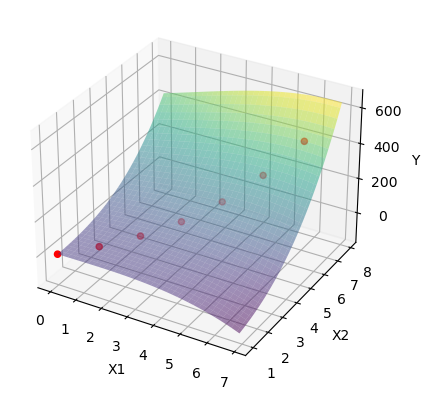

In [18]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x1_pred, x2_pred = np.meshgrid(np.arange(0, 7, 0.1), np.arange(1, 8, 0.1))
y_pred = model.predict(poly.fit_transform(np.column_stack((x1_pred.ravel(), x2_pred.ravel()))))
y_pred = y_pred.reshape(x1_pred.shape)
ax.scatter(x1, x2, y, c='red')
ax.plot_surface(x1_pred, x2_pred, y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [20]:

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([1, 6, 17, 34, 49,70, 100])


In [21]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

In [22]:

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

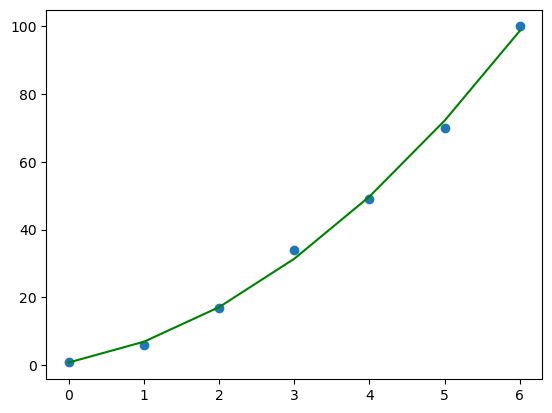

In [23]:

plt.scatter(x, y)
plt.plot(x, model.predict(x_poly), color='green')
plt.show()


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score



In [25]:
df = pd.read_csv("/kaggle/input/column-2c-wekacsv/column_2C_weka.csv")


In [26]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [27]:

df.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [28]:

abnormaldata1 = df[df['class'] =='Abnormal']
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)


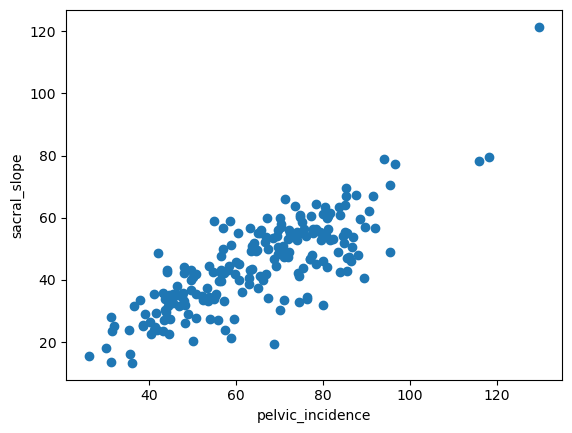

In [29]:

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.show()


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))


0.427619799498007


In [31]:

poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))


0.4607746393295462


In [32]:
X_new = np.linspace(0, 132, 200).reshape(200, 1)

X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

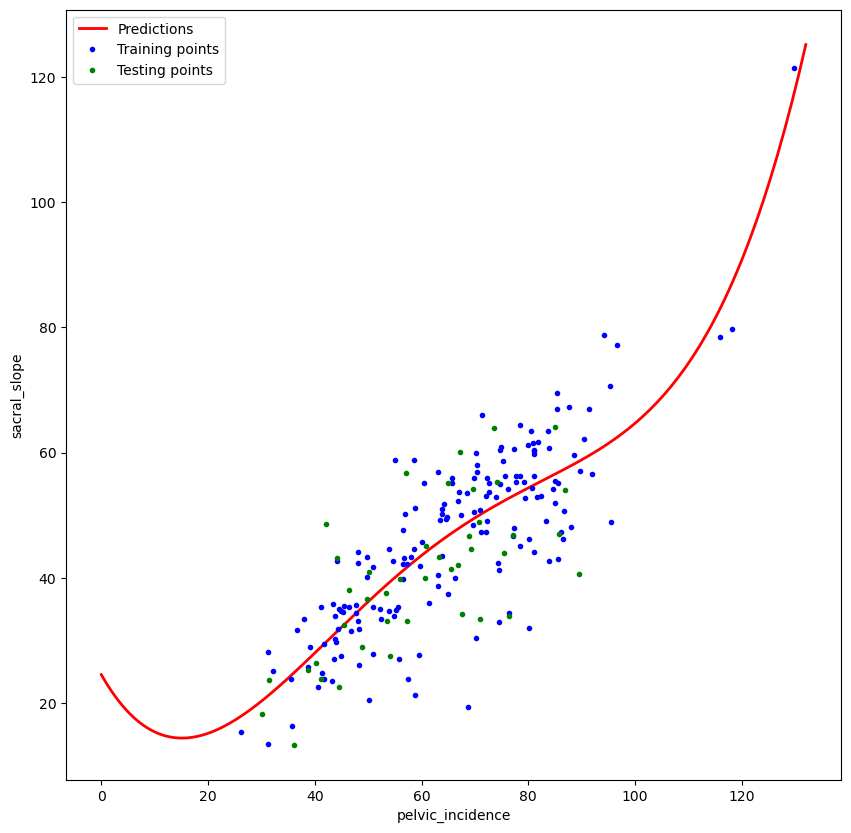

In [33]:


plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()
